<a href="https://colab.research.google.com/github/AVINASH-ANGILIKAM/CNN-Based-Waste-Classification-Using-BDWaste-Dataset/blob/main/Code_waste_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

# Mount your Google Drive
drive.mount('/content/drive')

# Define the dataset folder path
dataset_path = "/content/BDWaste"  # We'll use this as the main working directory

# If your dataset is in Drive, extract or copy it to /content/BDWaste
# Example: zip_path = "/content/drive/MyDrive/bdwaste.zip"


Mounted at /content/drive


In [2]:
import zipfile
import shutil

# Path to ZIP file in Drive (edit this if you’re using a ZIP)
zip_path = "/content/drive/MyDrive/BDWaste.zip"

# Extract if ZIP file exists
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")
    print("✅ Dataset extracted to /content/")
else:
    print("⚠️ ZIP file not found at the path provided.")

# OR if dataset is already a folder in Drive
# drive_folder_path = "/content/drive/MyDrive/BDWaste"
# shutil.copytree(drive_folder_path, dataset_path, dirs_exist_ok=True)


✅ Dataset extracted to /content/


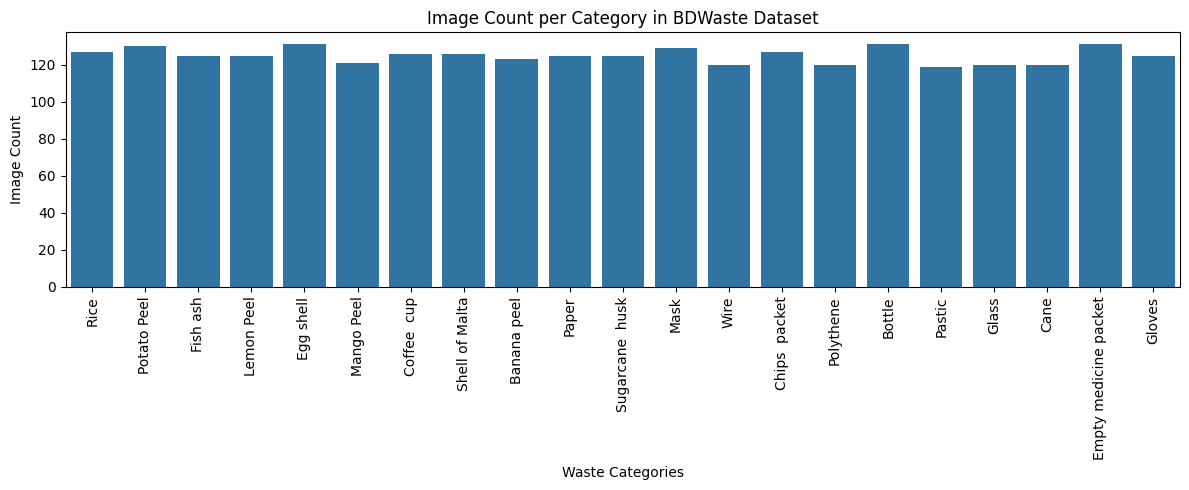


✅ Category-wise Image Count:
📌 Rice: 127 images
📌 Potato Peel: 130 images
📌 Fish ash: 125 images
📌 Lemon Peel: 125 images
📌 Egg shell: 131 images
📌 Mango Peel: 121 images
📌 Coffee  cup: 126 images
📌 Shell of Malta: 126 images
📌 Banana peel: 123 images
📌 Paper: 125 images
📌 Sugarcane  husk: 125 images
📌 Mask: 129 images
📌 Wire: 120 images
📌 Chips  packet: 127 images
📌 Polythene: 120 images
📌 Bottle: 131 images
📌 Pastic: 119 images
📌 Glass: 120 images
📌 Cane: 120 images
📌 Empty medicine packet: 131 images
📌 Gloves: 125 images


In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob

# Define paths for Digestive and Indigestive folders
digestive_path = os.path.join(dataset_path, "Digestive")
indigestive_path = os.path.join(dataset_path, "Indigestive")

# Function to count total images
def count_images(folder):
    counts = {}
    for category in os.listdir(folder):
        path = os.path.join(folder, category)
        if os.path.isdir(path):
            counts[category] = len(glob(os.path.join(path, "*.*")))
    return counts

# Get counts
digestive_counts = count_images(digestive_path)
indigestive_counts = count_images(indigestive_path)
total_counts = {**digestive_counts, **indigestive_counts}

# Convert to DataFrame
df_counts = pd.DataFrame(list(total_counts.items()), columns=["Category", "Image Count"])

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=df_counts, x="Category", y="Image Count")
plt.xticks(rotation=90)
plt.xlabel("Waste Categories")
plt.ylabel("Image Count")
plt.title("Image Count per Category in BDWaste Dataset")
plt.tight_layout()
plt.show()

# Print counts
print("\n✅ Category-wise Image Count:")
for category, count in total_counts.items():
    print(f"📌 {category}: {count} images")


In [4]:
import os
import shutil
import random

# Original dataset path
original_path = "/content/BDWaste"

# New root for split dataset
split_path = "/content/BDWaste_Split"
train_path = os.path.join(split_path, "train")
val_path = os.path.join(split_path, "val")
test_path = os.path.join(split_path, "test")

# Function to split each category
def split_data(source_folder, train_folder, val_folder, test_folder, train_ratio=0.8, val_ratio=0.1):
    for category in os.listdir(source_folder):
        category_path = os.path.join(source_folder, category)
        if os.path.isdir(category_path):
            images = os.listdir(category_path)
            random.shuffle(images)

            total = len(images)
            train_end = int(total * train_ratio)
            val_end = train_end + int(total * val_ratio)

            splits = {
                train_folder: images[:train_end],
                val_folder: images[train_end:val_end],
                test_folder: images[val_end:]
            }

            for split_folder, files in splits.items():
                cat_dir = os.path.join(split_folder, category)
                os.makedirs(cat_dir, exist_ok=True)
                for file in files:
                    src = os.path.join(category_path, file)
                    dst = os.path.join(cat_dir, file)
                    shutil.copyfile(src, dst)

# Run the split for Digestive and Indigestive
for class_type in ["Digestive", "Indigestive"]:
    src = os.path.join(original_path, class_type)
    split_data(
        src,
        os.path.join(train_path, class_type),
        os.path.join(val_path, class_type),
        os.path.join(test_path, class_type)
    )

print("✅ Dataset split into train (80%), val (10%), and test (10%)")


✅ Dataset split into train (80%), val (10%), and test (10%)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image properties
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Augmentation for training only
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

# No augmentation for val/test — only normalization
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important for test evaluation
)

print("✅ Data generators ready: train, validation, test")


Found 2093 images belonging to 2 classes.
Found 255 images belonging to 2 classes.
Found 277 images belonging to 2 classes.
✅ Data generators ready: train, validation, test


In [10]:
def save_model_artifacts(model, history, name):
    import os, json, pickle
    import matplotlib.pyplot as plt

    # Create directories
    os.makedirs("saved_models", exist_ok=True)
    os.makedirs("histories", exist_ok=True)
    os.makedirs("plots", exist_ok=True)

    # Save model
    model.save(f"saved_models/{name}.keras")

    # Save training history
    with open(f"histories/{name}_history.pkl", "wb") as f:
        pickle.dump(history.history, f)

    # Save accuracy plot
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{name} Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(f"plots/{name}_accuracy_plot.png")
    plt.close()

    # Save validation accuracy to JSON
    val_acc = history.history['val_accuracy'][-1]
    acc_path = "saved_models/model_val_accuracies.json"
    if os.path.exists(acc_path):
        with open(acc_path, "r") as f:
            results = json.load(f)
    else:
        results = {}
    results[name] = val_acc
    with open(acc_path, "w") as f:
        json.dump(results, f, indent=4)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model (same structure, clean input)
model = Sequential([
    Input(shape=(224, 224, 3)),

    # Block 1
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Classifier
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,082 (84.86 MB)

 Trainable params: 22,245,634 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
import warnings
import os
import pickle
import matplotlib.pyplot as plt

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    verbose=1
)

# Call the save function
save_model_artifacts(model, history, "Custom_CNN_model_waste_classifier")


Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.8474 - loss: 0.3514 - val_accuracy: 0.8745 - val_loss: 0.2421
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.8704 - loss: 0.4922 - val_accuracy: 0.8745 - val_loss: 0.3896
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 225s 3s/step - accuracy: 0.8545 - loss: 0.4210 - val_accuracy: 0.8510 - val_loss: 0.7388
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.8540 - loss: 0.2892 - val_accuracy: 0.8314 - val_loss: 1.0632
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.8471 - loss: 0.3300 - val_accuracy: 0.8706 - val_loss: 0.2599
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - accuracy: 0.8821 - loss: 0.2503 - val_accuracy: 0.8667 - val_loss: 0.2679
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.8740 - loss: 0.3880 - val_accuracy: 0.8784 - val_loss: 0.2422
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 219s 3s/step - accuracy: 0.8379 - loss: 0.4464 - val_accuracy: 0.8980 - v

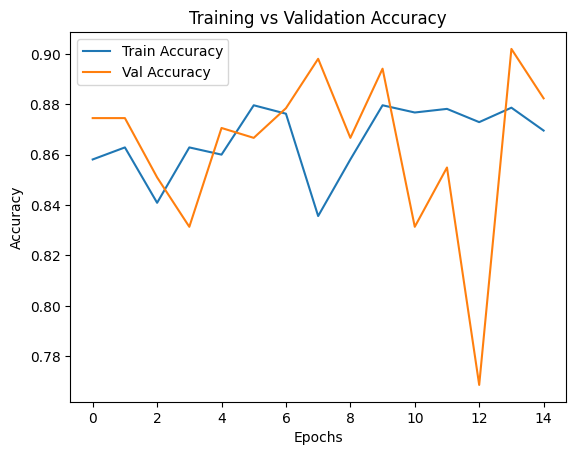

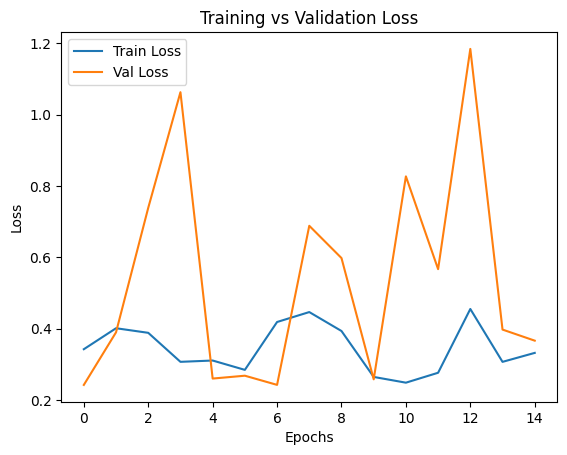

In [12]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [13]:
from tensorflow.keras.models import load_model
Custom_CNN_model_waste_classifier = load_model("saved_models/Custom_CNN_model_waste_classifier.keras")

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, model_name, test_generator):
    print(f"\n🔍 Evaluating {model_name} on Test Set...")

    # Accuracy and loss
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)
    print(f"\n✅ {model_name} - Test Accuracy: {test_acc:.4f}")
    print(f"🧪 {model_name} - Test Loss: {test_loss:.4f}")

    # Predictions
    preds = model.predict(test_generator)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_generator.classes
    labels = list(test_generator.class_indices.keys())

    # Classification Report
    print(f"\n📊 {model_name} - Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



🔍 Evaluating Custom_CNN_model_waste_classifier on Test Set...
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7574 - loss: 0.3839

✅ Custom_CNN_model_waste_classifier - Test Accuracy: 0.8592
🧪 Custom_CNN_model_waste_classifier - Test Loss: 0.3514
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step

📊 Custom_CNN_model_waste_classifier - Classification Report:
              precision    recall  f1-score   support

   Digestive       0.92      0.81      0.86       147
 Indigestive       0.81      0.92      0.86       130

    accuracy                           0.86       277
   macro avg       0.86      0.86      0.86       277
weighted avg       0.87      0.86      0.86       277



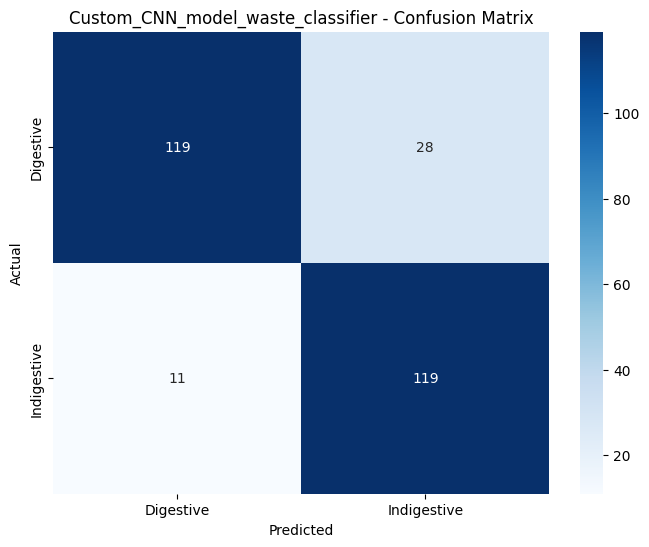

In [15]:
evaluate_model(Custom_CNN_model_waste_classifier, "Custom_CNN_model_waste_classifier", test_generator)


In [16]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n🎯 Test Accuracy: {test_acc:.4f}")
print(f"🧪 Test Loss: {test_loss:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7574 - loss: 0.3839

🎯 Test Accuracy: 0.8592
🧪 Test Loss: 0.3514


9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step
📊 Classification Report:

              precision    recall  f1-score   support

   Digestive       0.92      0.81      0.86       147
 Indigestive       0.81      0.92      0.86       130

    accuracy                           0.86       277
   macro avg       0.86      0.86      0.86       277
weighted avg       0.87      0.86      0.86       277



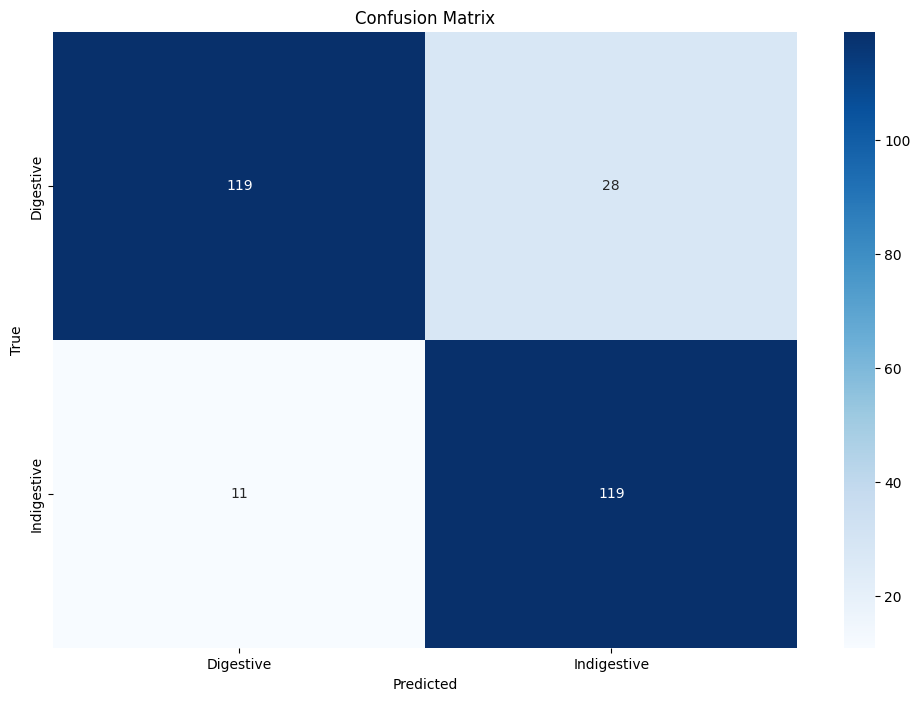

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [18]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle
import json
import os

# Model architectures to evaluate
architectures = {
    "VGG16": VGG16,
    "MobileNetV2": MobileNetV2,
    "ResNet50": ResNet50
}

results = {}

# Create output directory
os.makedirs("saved_models", exist_ok=True)
os.makedirs("plots", exist_ok=True)
os.makedirs("histories", exist_ok=True)

for name, base_fn in architectures.items():
    print(f"\n🔧 Training model: {name}")

    base_model = base_fn(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze base layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=15,
        callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
        verbose=1
    )

    # Save final validation accuracy
    val_acc = history.history['val_accuracy'][-1]
    results[name] = val_acc

    # Save model
    model.save(f"saved_models/{name}_waste_classifier.keras")

    # Save training history
    with open(f"histories/{name}_history.pkl", 'wb') as f:
        pickle.dump(history.history, f)

    # Plot and save accuracy curve
    plt.figure()
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f"plots/{name}_accuracy_plot.png")
    plt.close()

    # Call save_model_artifacts after each model is trained
    save_model_artifacts(model, history, name)  # Call the function that you already defined

# Save all validation accuracies to JSON
with open("saved_models/model_val_accuracies.json", "w") as f:
    json.dump(results, f, indent=4)

# Print comparison
print("\n📊 Model Validation Accuracies:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")



🔧 Training model: VGG16
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 223s 3s/step - accuracy: 0.5303 - loss: 0.7410 - val_accuracy: 0.8000 - val_loss: 0.5704
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.6281 - loss: 0.6375 - val_accuracy: 0.8000 - val_loss: 0.4931
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 218s 3s/step - accuracy: 0.6875 - loss: 0.5678 - val_accuracy: 0.8196 - val_loss: 0.4404
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.7751 - loss: 0.4882 - val_accuracy: 0.8588 - val_loss: 0.4128
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.7984 - loss: 0.4624 - val_accuracy: 0.8431 - val_loss: 0.3761
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.8084 - loss: 0.4266 - val_accuracy: 0.8627 - val_loss: 0.3491
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.8362 - loss: 0.3899 - val_accuracy: 0.8745 - val_loss: 0.3423
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━

Found 277 images belonging to 2 classes.

🔍 Evaluating VGG16 on Test Set
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.8755 - loss: 0.2605

✅ VGG16 - Test Accuracy: 0.9278
🧪 VGG16 - Test Loss: 0.2195
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step

📊 VGG16 - Classification Report
              precision    recall  f1-score   support

   Digestive       0.96      0.90      0.93       147
 Indigestive       0.90      0.95      0.93       130

    accuracy                           0.93       277
   macro avg       0.93      0.93      0.93       277
weighted avg       0.93      0.93      0.93       277



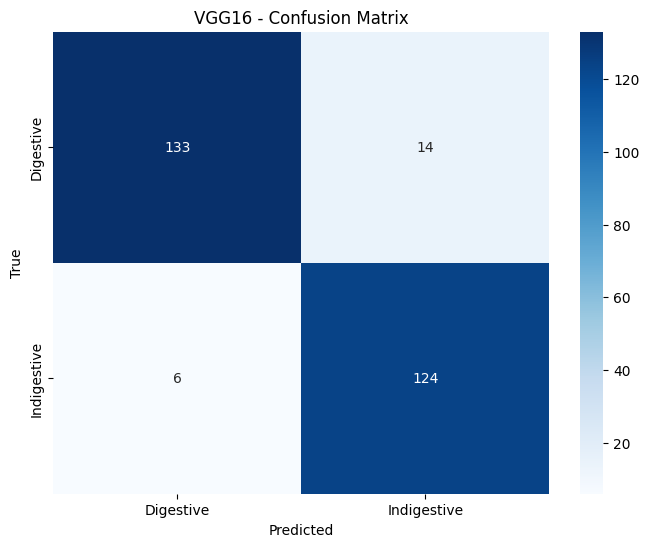


🔍 Evaluating MobileNetV2 on Test Set
9/9 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9892 - loss: 0.0413

✅ MobileNetV2 - Test Accuracy: 0.9928
🧪 MobileNetV2 - Test Loss: 0.0243
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step

📊 MobileNetV2 - Classification Report
              precision    recall  f1-score   support

   Digestive       0.99      0.99      0.99       147
 Indigestive       0.99      0.99      0.99       130

    accuracy                           0.99       277
   macro avg       0.99      0.99      0.99       277
weighted avg       0.99      0.99      0.99       277



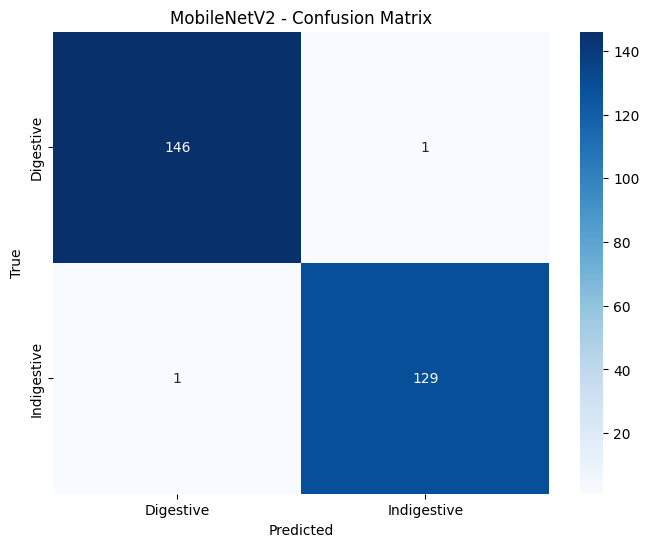


🔍 Evaluating ResNet50 on Test Set
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.6370 - loss: 0.6080

✅ ResNet50 - Test Accuracy: 0.6823
🧪 ResNet50 - Test Loss: 0.5948
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step

📊 ResNet50 - Classification Report
              precision    recall  f1-score   support

   Digestive       0.72      0.67      0.69       147
 Indigestive       0.65      0.70      0.67       130

    accuracy                           0.68       277
   macro avg       0.68      0.68      0.68       277
weighted avg       0.68      0.68      0.68       277



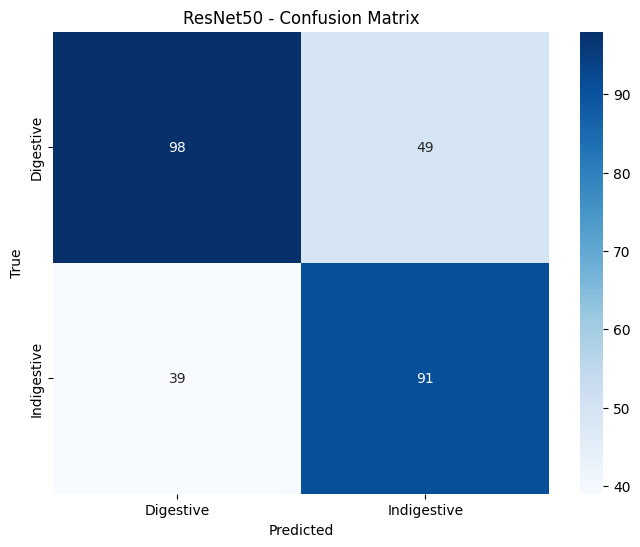

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# STEP 1: Load Test Generator
test_path = "/content/BDWaste_Split/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# STEP 2: Load and Recompile Models (to remove warning)
vgg_model = load_model("saved_models/VGG16_waste_classifier.keras")
mobilenet_model = load_model("saved_models/MobileNetV2_waste_classifier.keras")
resNet50_model = load_model("saved_models/ResNet50_waste_classifier.keras")

# ✅ Recompile to build metrics correctly
vgg_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
resNet50_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 3: Evaluation Function
def evaluate_model_on_test(model, model_name):
    print(f"\n🔍 Evaluating {model_name} on Test Set")

    # Test accuracy & loss
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)
    print(f"\n✅ {model_name} - Test Accuracy: {test_acc:.4f}")
    print(f"🧪 {model_name} - Test Loss: {test_loss:.4f}")

    # Predictions
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Classification report
    print(f"\n📊 {model_name} - Classification Report")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# STEP 4: Evaluate All Models
evaluate_model_on_test(vgg_model, "VGG16")
evaluate_model_on_test(mobilenet_model, "MobileNetV2")
evaluate_model_on_test(resNet50_model, "ResNet50")


In [20]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Build the model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)  # You can change units if needed
x = Dropout(0.5)(x)  # ✅ Fixed dropout at 0.5
outputs = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),  # Fixed learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model once
model.fit(train_generator,
          validation_data=val_generator,
          epochs=15,  # Adjust epochs as needed
          verbose=1)


# Example usage after training your model
save_model_artifacts(model, history, "Tuned_Mobilenetv2_waste_classifier")

Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.6194 - loss: 0.8168 - val_accuracy: 0.9059 - val_loss: 0.2634
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 234s 4s/step - accuracy: 0.8788 - loss: 0.2945 - val_accuracy: 0.9373 - val_loss: 0.1758
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.9251 - loss: 0.2027 - val_accuracy: 0.9647 - val_loss: 0.1296
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.9364 - loss: 0.1627 - val_accuracy: 0.9725 - val_loss: 0.0999
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.9573 - loss: 0.1295 - val_accuracy: 0.9765 - val_loss: 0.0821
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.9727 - loss: 0.0988 - val_accuracy: 0.9843 - val_loss: 0.0629
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.9738 - loss: 0.0920 - val_accuracy: 0.9843 - val_loss: 0.0586
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.9730 - loss: 0.0856 - val_accuracy: 0.9843 - v

In [21]:
from tensorflow.keras.models import load_model

tuned_mobilenetv2_model_waste_classifier =load_model("saved_models/Tuned_Mobilenetv2_waste_classifier.keras")


🔍 Evaluating Tuned_Mobilenetv2_waste_classifier on Test Set...
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9724 - loss: 0.0542

✅ Tuned_Mobilenetv2_waste_classifier - Test Accuracy: 0.9892
🧪 Tuned_Mobilenetv2_waste_classifier - Test Loss: 0.0288
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step

📊 Tuned_Mobilenetv2_waste_classifier - Classification Report:
              precision    recall  f1-score   support

   Digestive       1.00      0.98      0.99       147
 Indigestive       0.98      1.00      0.99       130

    accuracy                           0.99       277
   macro avg       0.99      0.99      0.99       277
weighted avg       0.99      0.99      0.99       277



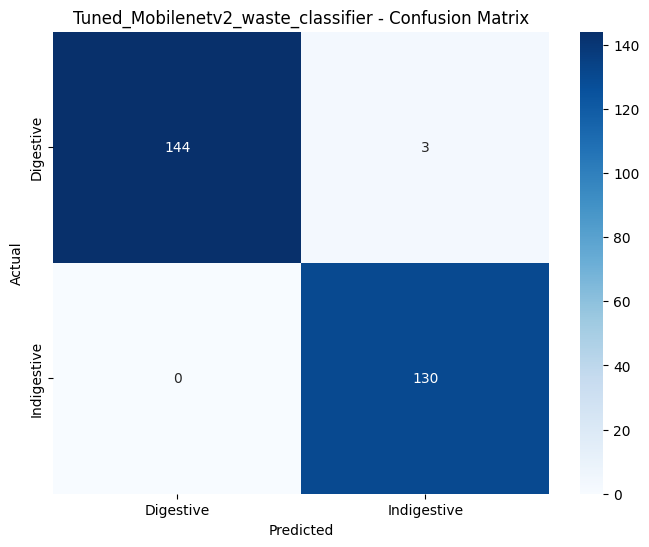

In [23]:
evaluate_model(tuned_mobilenetv2_model_waste_classifier, "Tuned_Mobilenetv2_waste_classifier", test_generator)


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Define your custom CNN with adjustable hyperparameters
def build_custom_cnn(optimizer='adam', learning_rate=1e-4, dropout_rate=0.5, filters=[32, 64, 128], num_classes=2):
    model = Sequential([
        Input(shape=(224, 224, 3)),

        Conv2D(filters[0], (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),

        Conv2D(filters[1], (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),

        Conv2D(filters[2], (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    # Choose optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate, momentum=0.9)

    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model
model = build_custom_cnn(
    optimizer='adam',
    learning_rate=1e-4,
    dropout_rate=0.5,
    filters=[32, 64, 128],
    num_classes=2
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    verbose=1
)

# Save the model, history, and plot in structured folders
save_model_artifacts(model, history, "Tuned_Custom_CNN_model_waste_classifier")

Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 222s 3s/step - accuracy: 0.7204 - loss: 2.2911 - val_accuracy: 0.4745 - val_loss: 4.6190
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.8470 - loss: 0.4951 - val_accuracy: 0.4745 - val_loss: 6.5621
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.8815 - loss: 0.2977 - val_accuracy: 0.4745 - val_loss: 6.6521
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.8873 - loss: 0.2628 - val_accuracy: 0.4784 - val_loss: 3.0573
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9091 - loss: 0.2164 - val_accuracy: 0.7020 - val_loss: 0.9936
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.9131 - loss: 0.2158 - val_accuracy: 0.6941 - val_loss: 0.8484
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.9276 - loss: 0.1802 - val_accuracy: 0.8471 - val_loss: 0.4458
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.9138 - loss: 0.1939 - val_accuracy: 0.9294 - v

In [25]:
tuned_Custom_CNN_model_waste_classifier =load_model("saved_models/Tuned_Custom_CNN_model_waste_classifier.keras")


🔍 Evaluating Tuned_Custom_CNN_model_waste_classifier on Test Set...
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.9099 - loss: 0.2160

✅ Tuned_Custom_CNN_model_waste_classifier - Test Accuracy: 0.9567
🧪 Tuned_Custom_CNN_model_waste_classifier - Test Loss: 0.1084
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step

📊 Tuned_Custom_CNN_model_waste_classifier - Classification Report:
              precision    recall  f1-score   support

   Digestive       0.99      0.93      0.96       147
 Indigestive       0.93      0.98      0.96       130

    accuracy                           0.96       277
   macro avg       0.96      0.96      0.96       277
weighted avg       0.96      0.96      0.96       277



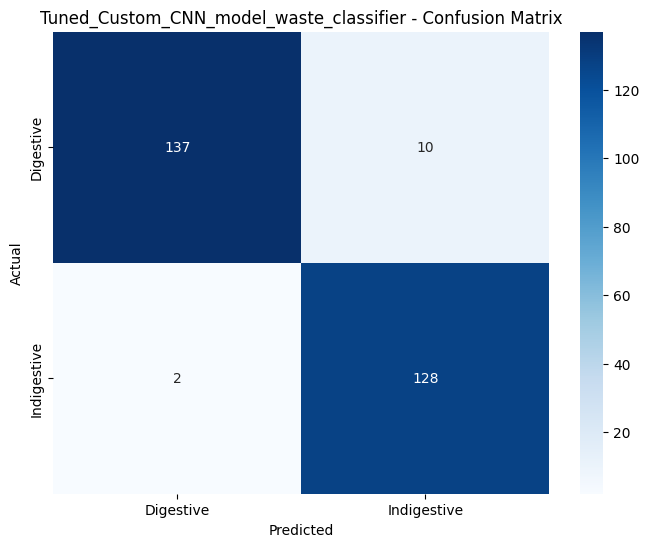

In [26]:
evaluate_model(tuned_Custom_CNN_model_waste_classifier, "Tuned_Custom_CNN_model_waste_classifier", test_generator)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def compare_models(models_dict, test_generator):
    results = []

    for name, model in models_dict.items():
        print(f"\n🔍 Evaluating {name}...")

        loss, acc = model.evaluate(test_generator, verbose=0)
        y_pred = np.argmax(model.predict(test_generator), axis=1)
        y_true = test_generator.classes
        report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)

        f1 = report['weighted avg']['f1-score']
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']

        results.append({
            'Model': name,
            'Test Accuracy': round(acc, 4),
            'Test Loss': round(loss, 4),
            'Precision': round(precision, 4),
            'Recall': round(recall, 4),
            'F1-Score': round(f1, 4)
        })

    return results


In [28]:
# Models to compare
models = {
    "Tuned_Custom_CNN_model_waste_classifier": tuned_Custom_CNN_model_waste_classifier,
    "Tuned_Mobilenetv2_model_waste_classifier": tuned_mobilenetv2_model_waste_classifier
}


# Run comparison
comparison_results = compare_models(models, test_generator)
import pandas as pd


df_results = pd.DataFrame(comparison_results)
df_results.set_index('Model', inplace=True)
display(df_results)



🔍 Evaluating Tuned_Custom_CNN_model_waste_classifier...
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step

🔍 Evaluating Tuned_Mobilenetv2_model_waste_classifier...
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step


,Test Accuracy,Test Loss,Precision,Recall,F1-Score
Model,,,,,
Tuned_Custom_CNN_model_waste_classifier,0.9567,0.1084,0.9584,0.9567,0.9567
Tuned_Mobilenetv2_model_waste_classifier,0.9892,0.0288,0.9894,0.9892,0.9892
